In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2025-01-05 01:50:37.434482: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-05 01:50:37.690531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-05 01:50:37.862037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736041838.215029    7964 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736041838.278844    7964 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 01:50:39.051166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
df = pd.read_csv('nepse.csv')
df = df[['Date','Close']]
df.head()

,Date,Close
0,2025-01-02,2586.23
1,2025-01-01,2581.60
2,2024-12-31,2576.50
3,2024-12-29,2609.58
4,2024-12-26,2630.71


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1112 non-null   object 
 1   Close   1112 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.5+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1112 non-null   datetime64[ns]
 1   Close   1112 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.5 KB


In [9]:
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [10]:
df

,Date,Close
0,2025-01-02,0.695465
1,2025-01-01,0.693161
2,2024-12-31,0.690623
3,2024-12-29,0.707085
4,2024-12-26,0.717600
...,...,...
1107,2020-01-28,0.058448
1108,2020-01-27,0.055696
1109,2020-01-26,0.043782
1110,2020-01-23,0.054128


In [20]:
close_prices = df['Close'].values.reshape(-1,1)
close_prices

array([[0.69546502],
       [0.69316095],
       [0.69062299],
       ...,
       [0.04378225],
       [0.05412816],
       [0.0620655 ]])

In [21]:
len(close_prices)

1112

In [22]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])

    return np.array(sequences), np.array(labels)

In [23]:
seq_length = 3
X, y = create_sequences(close_prices, seq_length)


In [24]:
X.shape

(1109, 3, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
X_train.shape

(887, 3, 1)

In [27]:
y.shape

(1109, 1)

In [30]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dense(1)

])
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)
predicted = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

print("Predicted Prices: ", predicted_prices)
print("Real Prices: ", real_prices)


Epoch 1/100
 35/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7649e-04 

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8340e-04
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3750e-04
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8724e-04
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6433e-04
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2905e-04
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1660e-04
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2423e-04
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3604e-04
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9400e-04
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0538e-04
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5942e-04
Epoch 12/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3573e-04
Epoch 13/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3984e-04
Epoch 14/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2209e-04

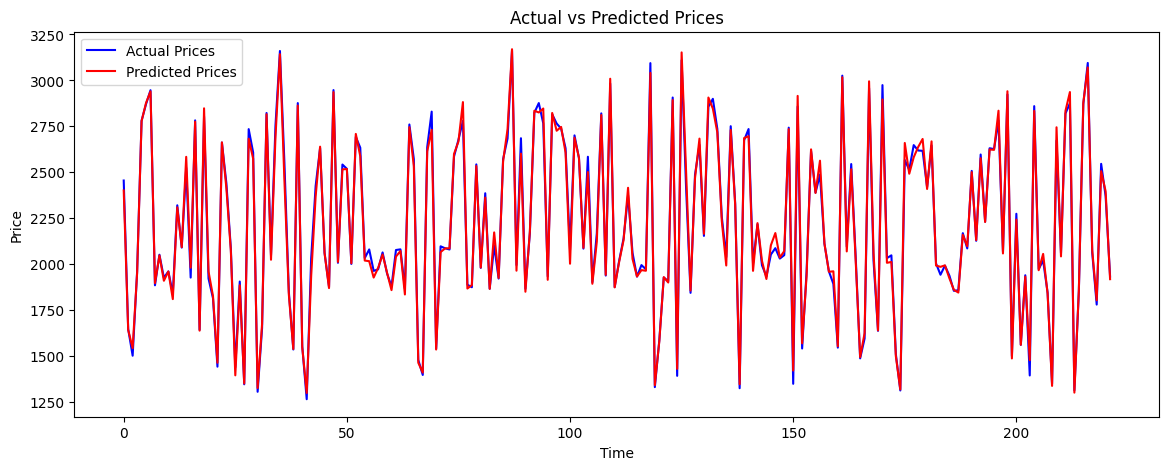

In [33]:
# Actual vs Predicted Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(real_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
